In [9]:
from google.colab import files
uploaded = files.upload()

Saving sales.csv to sales.csv


In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv( './bicycle.csv', encoding='euc-kr')

In [11]:
#결측값 확인
df.isnull() #df.notnull()
df.isnull().sum() # 결측값들의 합

자전거번호       0
대여일시        0
대여소번호       0
대여소명        0
대여거치대      24
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대      11
이용시간       15
이용거리       16
dtype: int64

In [12]:
#결측 데이터 제거
df_droprow = df.dropna(axis=0)
df_dropcolumn = df.dropna(axis=1) 
print( df_droprow.isnull().sum() )
print(df_droprow.columns)
print(df_dropcolumn.columns)
# 컬럼명은 남아있고 결측값만 제거

자전거번호      0
대여일시       0
대여소번호      0
대여소명       0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
dtype: int64
Index(['자전거번호', '대여일시', '대여소번호', '대여소명', '대여거치대', '반납일시', '반납대여소번호', '반납대여소명',
       '반납거치대', '이용시간', '이용거리'],
      dtype='object')
Index(['자전거번호', '대여일시', '대여소번호', '대여소명', '반납일시', '반납대여소번호', '반납대여소명'], dtype='object')


In [13]:
#결측 데이터 대체
import copy
df1 = df.fillna(0)
df2 = df.fillna( df.mean())
df3 = df['이용거리'].fillna( df.mean()['이용거리']) # 
df4 = copy.deepcopy(df)
df4['이용거리']=df3

<ipython-input-13-6781a1b425f0>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df.fillna( df.mean())
<ipython-input-13-6781a1b425f0>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df3 = df['이용거리'].fillna( df.mean()['이용거리']) #


In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv( './bicycle_out.csv', encoding='euc-kr')
df.head()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120


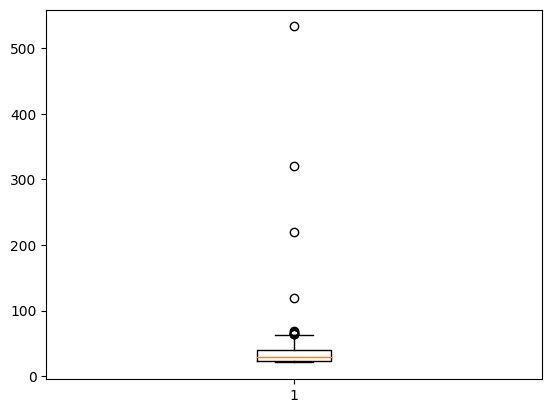

4     120
30    533
47    320
86    220
Name: 나이, dtype: int64


In [15]:
#이상 데이터 시각화
import matplotlib as mpl       #맷플롭립
import matplotlib.pylab as plt   #맷플롭립

plt.boxplot(df['나이'])
plt.show()

print( df[df.나이>100]['나이'] )

In [16]:
# 이상값이 있는 1번째 행 제거 
df.drop(4,0)

<ipython-input-16-ea7d0c8f3349>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(4,0)


,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0,31
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
5,SPB-18401,2019-11-06 8:52,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-06 9:09,3,중랑센터,7.0,11.0,1350.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [17]:
import pandas as pd
import numpy as np
df = pd.read_csv( './bicycle_dup.csv', encoding='euc-kr')
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0,50
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1100.0,50
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN,32
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0,21
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0,120
...,...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0,22
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN,22
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0,37
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0,27


In [19]:
# duplicated() 메소드로 중복 데이터 찾기
# dataFrame.dupliated()는 True, False의 boolean 형태의 Series 반환
print( df.duplicated(['이용거리', '나이']) )

0      False
1       True
2      False
3      False
4      False
       ...  
415    False
416     True
417    False
418    False
419    False
Length: 420, dtype: bool


In [21]:
#날짜 데이터
import pandas as pd
import numpy as np
df = pd.read_csv( './bicycle.csv', encoding='euc-kr')

df['month'] = pd.to_datetime( df['대여일시'] ).dt.strftime( '%Y%m') # 날짜 형식을 문자열로
print( df.month )

0      201911
1      201911
2      201911
3      201911
4      201911
        ...  
415    201911
416    201911
417    201911
418    201911
419    201911
Name: month, Length: 420, dtype: object
